<a href="https://colab.research.google.com/github/yuliyaosipava/forecast/blob/main/Welcom_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Анализ направлений смены тарифных планов**
Мы уже определили шаги для анализа направлений смены тарифных планов. Давайте посмотрим на данные и определим, какие направления смен тарифных планов наиболее популярны.
Для определения наибольших перетоков между тарифными планами необходимо:



1.   Определить пары старый тариф -> новый тариф.
2.   Подсчитать количество переходов для каждой пары.
3.   Визуализировать эти переходы на диаграмме.

**2. Изменение среднемесячного счета**
Для этого анализа необходимо выполнить следующие шаги:

1.  Определить месяцы за три месяца до и после изменения тарифного плана.
2. Рассчитать среднемесячный счет за каждый из этих периодов.
3. Сравнить изменения и визуализировать результаты.

**3. Изменение уровня блокировок**
Для анализа изменений в уровне блокировок необходимо:

1. Определить, были ли абоненты заблокированы в трехмесячные периоды до и после смены тарифа.
2. Подсчитать частоту блокировок для каждого периода.
3. Сравнить изменения частоты блокировок и визуализировать результаты.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Tariff_plans_change.csv to Tariff_plans_change (1).csv


Saving Charges.csv to Charges (1).csv


In [ ]:
# Загрузка файла
files.download('tariff_change_impact.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1. **Анализ направлений смены тарифных планов**
На основании предоставленных данных определим пары старый тариф -> новый тариф для каждого абонента и подсчитаем количество переходов для каждой пары.

In [ ]:
import pandas as pd

# Загрузка данных
data = pd.read_csv('Tariff_plans_change.csv')

# Определение пар тарифов
data['PREV_TARIFF_PLAN_ID'] = data.groupby('SUBSCRIBER_ID')['TARIFF_PLAN_ID'].shift(1)
pairs = data.dropna(subset=['PREV_TARIFF_PLAN_ID'])

# Подсчет количества переходов
flows = pairs.groupby(['PREV_TARIFF_PLAN_ID', 'TARIFF_PLAN_ID']).size().reset_index(name='COUNT')
flows = flows.sort_values(by='COUNT', ascending=False)

print(flows)


    PREV_TARIFF_PLAN_ID  TARIFF_PLAN_ID  COUNT
13                  3.0               5   2372
4                   1.0               5   1613
18                  4.0               5    528
8                   2.0               5    417
3                   1.0               4    378
12                  3.0               4    367
7                   2.0               4    158
19                  5.0               1     81
21                  5.0               3     75
16                  4.0               3     56
2                   1.0               3     55
22                  5.0               4     49
14                  4.0               1     37
23                  5.0               5     29
9                   3.0               1     28
11                  3.0               3     21
15                  4.0               2     20
6                   2.0               3     20
5                   2.0               1     13
10                  3.0               2     12
0            

<ipython-input-5-02d6b6c6f8a5>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tariff_plans['START_DTTM'].replace('$null$', pd.NaT, inplace=True)
<ipython-input-5-02d6b6c6f8a5>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

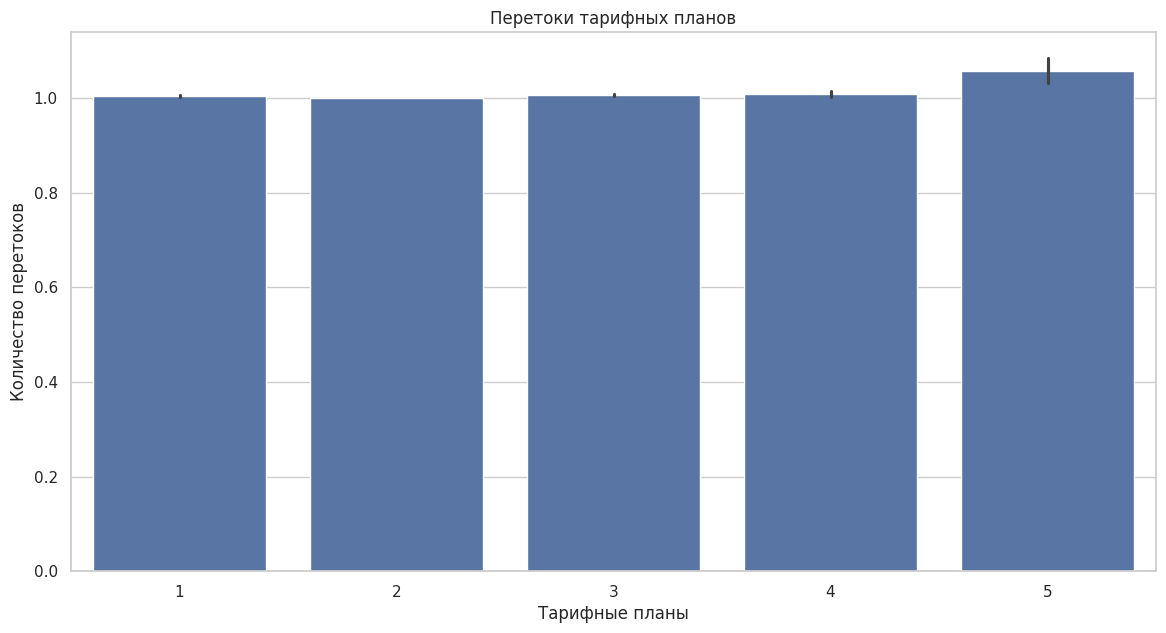

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
tariff_plans = pd.read_csv('Tariff_plans_change.csv')

# Замена некорректных значений на NaN
tariff_plans['START_DTTM'].replace('$null$', pd.NaT, inplace=True)
tariff_plans['END_DTTM'].replace('$null$', pd.NaT, inplace=True)

# Создание DataFrame с начала и конца тарифных планов
tariff_flows = tariff_plans.dropna(subset=['END_DTTM'])
tariff_flows['START_DTTM'] = pd.to_datetime(tariff_flows['START_DTTM'], errors='coerce')
tariff_flows['END_DTTM'] = pd.to_datetime(tariff_flows['END_DTTM'], errors='coerce')

# Удаление строк с некорректными датами
tariff_flows = tariff_flows.dropna(subset=['START_DTTM', 'END_DTTM'])

# Группировка данных для подсчета перетоков
tariff_flows = tariff_flows.groupby(['TARIFF_PLAN_ID', 'END_DTTM']).size().reset_index(name='count')

# Визуализация данных
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")
sns.barplot(x='TARIFF_PLAN_ID', y='count', data=tariff_flows)
plt.title('Перетоки тарифных планов')
plt.xlabel('Тарифные планы')
plt.ylabel('Количество перетоков')
plt.show()


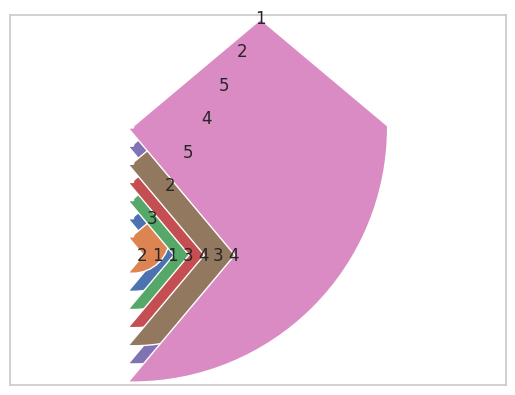

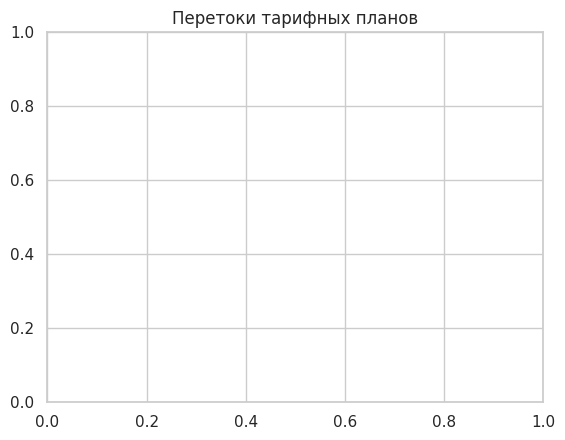

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

# Пример данных
flows = pd.DataFrame({
    'PREV_TARIFF_PLAN_ID': [1, 2, 1, 3, 3, 4, 4],
    'TARIFF_PLAN_ID': [2, 3, 5, 4, 2, 5, 1],
    'COUNT': [10, 5, 15, 20, 30, 25, 35]
})

# Создание Sankey диаграммы
sankey = Sankey(unit=None)
for index, row in flows.iterrows():
    sankey.add(flows=[row['COUNT'], -row['COUNT']], labels=[f"{int(row['PREV_TARIFF_PLAN_ID'])}", f"{int(row['TARIFF_PLAN_ID'])}"], orientations=[0, 1])

fig, ax = plt.subplots()
sankey.finish()
plt.title('Перетоки тарифных планов')
plt.show()


новый код

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Загрузка данных
tariff_plans = pd.read_csv('Tariff_plans_change.csv')

# Замена некорректных значений на NaN
tariff_plans['START_DTTM'].replace('$null$', pd.NaT, inplace=True)
tariff_plans['END_DTTM'].replace('$null$', pd.NaT, inplace=True)

# Преобразование дат в формат datetime
tariff_plans['START_DTTM'] = pd.to_datetime(tariff_plans['START_DTTM'], errors='coerce')
tariff_plans['END_DTTM'] = pd.to_datetime(tariff_plans['END_DTTM'], errors='coerce')

# Удаление строк с некорректными датами
tariff_flows = tariff_plans.dropna(subset=['START_DTTM', 'END_DTTM'])

# Определение предыдущего тарифного плана
tariff_flows['PREV_TARIFF_PLAN_ID'] = tariff_flows.groupby('SUBSCRIBER_ID')['TARIFF_PLAN_ID'].shift(1)
tariff_flows = tariff_flows.dropna(subset=['PREV_TARIFF_PLAN_ID'])

# Подсчет количества переходов
flows = tariff_flows.groupby(['PREV_TARIFF_PLAN_ID', 'TARIFF_PLAN_ID']).size().reset_index(name='COUNT')

# Подготовка данных для Sankey диаграммы
source = flows['PREV_TARIFF_PLAN_ID'].astype(int).tolist()
target = flows['TARIFF_PLAN_ID'].astype(int).tolist()
value = flows['COUNT'].tolist()

# Создание Sankey диаграммы
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=["Тариф " + str(i) for i in range(1, max(max(source), max(target)) + 1)],
        color="blue"
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    ))])

fig.update_layout(title_text="Перетоки тарифных планов", font_size=10)
fig.show()


<ipython-input-10-2dd642d8490c>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tariff_plans['START_DTTM'].replace('$null$', pd.NaT, inplace=True)
<ipython-input-10-2dd642d8490c>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:
import pandas as pd

# Загрузка данных
results_df = pd.read_excel('tariff_change_impact.xlsx')
tariff_plans = pd.read_csv('Tariff_plans_change.csv')

# Объединение данных
tariff_plans['START_DTTM'] = pd.to_datetime(tariff_plans['START_DTTM'])
tariff_plans['END_DTTM'] = pd.to_datetime(tariff_plans['END_DTTM'])
merged_df = pd.merge(tariff_plans, results_df, on='SUBSCRIBER_ID')

# Определение пар тарифных планов
merged_df['PREV_TARIFF_PLAN_ID'] = merged_df.groupby('SUBSCRIBER_ID')['TARIFF_PLAN_ID'].shift(1)
merged_df = merged_df.dropna(subset=['PREV_TARIFF_PLAN_ID'])

# Подсчет среднего изменения счета для каждой пары тарифных планов
changes = merged_df.groupby(['PREV_TARIFF_PLAN_ID', 'TARIFF_PLAN_ID']).agg({'CHANGE': 'mean'}).reset_index()

# Определение направлений смен с ростом и сокращением среднего счета
growth = changes[changes['CHANGE'] > 0]
decline = changes[changes['CHANGE'] < 0]

print("Направления смен тарифных планов с ростом среднего счета:")
print(growth)

print("Направления смен тарифных планов с сокращением среднего счета:")
print(decline)

# Запись результатов в Excel файл
with pd.ExcelWriter('tariff_change_analysis.xlsx') as writer:
    growth.to_excel(writer, sheet_name='Growth', index=False)
    decline.to_excel(writer, sheet_name='Decline', index=False)

print('Результаты сохранены в файл "tariff_change_analysis.xlsx"')


ValueError: time data "$null$" doesn't match format "%Y-%m-%d %H:%M:%S", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

старый код

In [ ]:
import pandas as pd

# Загрузка данных
results_df = pd.read_excel('tariff_change_impact.xlsx')
tariff_plans = pd.read_csv('Tariff_plans_change.csv')

# Объединение данных
tariff_plans['START_DTTM'] = pd.to_datetime(tariff_plans['START_DTTM'])
tariff_plans['END_DTTM'] = pd.to_datetime(tariff_plans['END_DTTM'])
merged_df = pd.merge(tariff_plans, results_df, on='SUBSCRIBER_ID')

# Определение пар тарифных планов
merged_df['PREV_TARIFF_PLAN_ID'] = merged_df.groupby('SUBSCRIBER_ID')['TARIFF_PLAN_ID'].shift(1)
merged_df = merged_df.dropna(subset=['PREV_TARIFF_PLAN_ID'])

# Подсчет среднего изменения счета для каждой пары тарифных планов
changes = merged_df.groupby(['PREV_TARIFF_PLAN_ID', 'TARIFF_PLAN_ID']).agg({'CHANGE': 'mean'}).reset_index()

# Определение направлений смен с ростом и сокращением среднего счета
growth = changes[changes['CHANGE'] > 0]
decline = changes[changes['CHANGE'] < 0]

print("Направления смен тарифных планов с ростом среднего счета:")
print(growth)

print("Направления смен тарифных планов с сокращением среднего счета:")
print(decline)

# Запись результатов в Excel файл
with pd.ExcelWriter('tariff_change_analysis.xlsx') as writer:
    growth.to_excel(writer, sheet_name='Growth', index=False)
    decline.to_excel(writer, sheet_name='Decline', index=False)

print('Результаты сохранены в файл "tariff_change_analysis.xlsx"')


ValueError: time data "$null$" doesn't match format "%Y-%m-%d %H:%M:%S", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
import pandas as pd
from google.colab import files

# Загрузка данных
charges = pd.read_csv('Charges.csv')
tariff_plans = pd.read_csv('Tariff_plans_change.csv')

# Преобразование даты в формат datetime
charges['BILL_MONTH'] = pd.to_datetime(charges['BILL_MONTH'])
tariff_plans['START_DTTM'] = pd.to_datetime(tariff_plans['START_DTTM'])

# Создание списка для хранения результатов
results = []

# Определение 3-месячных периодов до и после смены тарифного плана
for i, row in tariff_plans.iterrows():
    subscriber_id = row['SUBSCRIBER_ID']
    start_date = row['START_DTTM']

    # Период до смены
    pre_change_period = charges[(charges['SUBSCRIBER_ID'] == subscriber_id) &
                                (charges['BILL_MONTH'] >= (start_date - pd.DateOffset(months=3))) &
                                (charges['BILL_MONTH'] < start_date)]

    # Период после смены
    post_change_period = charges[(charges['SUBSCRIBER_ID'] == subscriber_id) &
                                 (charges['BILL_MONTH'] > start_date) &
                                 (charges['BILL_MONTH'] <= (start_date + pd.DateOffset(months=3)))]

    # Проверка наличия данных перед расчетом
    pre_change_avg = pre_change_period['CHARGES'].mean() if not pre_change_period.empty else 0
    post_change_avg = post_change_period['CHARGES'].mean() if not post_change_period.empty else 0

    # Сохранение результатов
    results.append([subscriber_id, pre_change_avg, post_change_avg])

# Создание DataFrame из результатов
results_df = pd.DataFrame(results, columns=['SUBSCRIBER_ID', 'AVG_BEFORE', 'AVG_AFTER'])

# Запись результатов в Excel файл
results_df.to_excel('tariff_change_impact.xlsx', index=False)
print('Результаты сохранены в файл "tariff_change_impact.xlsx"')

# Загрузка файла
files.download('tariff_change_impact.xlsx')


Результаты сохранены в файл "tariff_change_impact.xlsx"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Направления смен тарифных планов с ростом среднего счета:
    PREV_TARIFF_PLAN_ID  TARIFF_PLAN_ID    CHANGE
0                   1.0               1  0.670807
10                  3.0               2  2.517600
14                  4.0               1  0.052651
15                  4.0               2  0.411607
Направления смен тарифных планов с сокращением среднего счета:
    PREV_TARIFF_PLAN_ID  TARIFF_PLAN_ID    CHANGE
1                   1.0               2 -1.559267
2                   1.0               3 -2.024560
3                   1.0               4 -2.037365
4                   1.0               5 -2.266550
5                   2.0               1 -1.365923
6                   2.0               3 -3.260190
7                   2.0               4 -1.686390
8                   2.0               5 -2.058521
9                   3.0               1 -1.235883
11                  3.0               3 -0.452264
12                  3.0               4 -2.515168
13                  3.0      

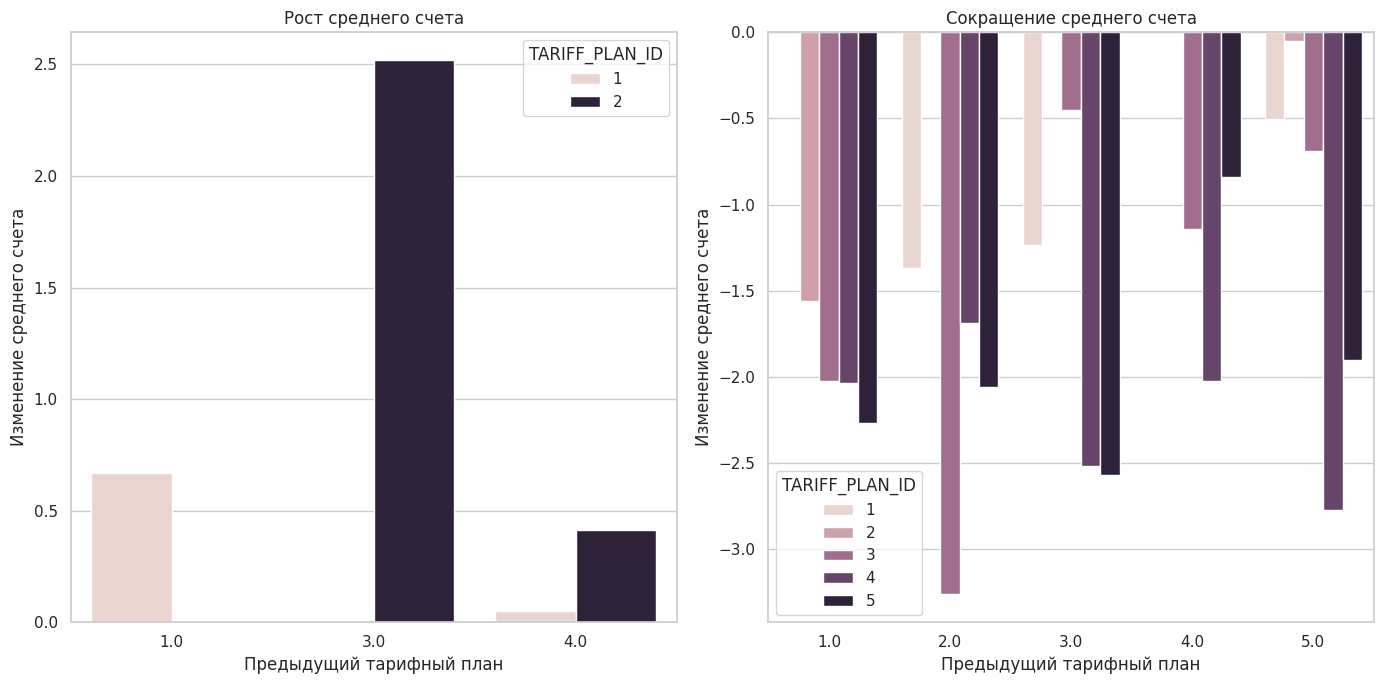

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
charges = pd.read_csv('Charges.csv')
tariff_plans = pd.read_csv('Tariff_plans_change.csv')

# Преобразование даты в формат datetime
charges['BILL_MONTH'] = pd.to_datetime(charges['BILL_MONTH'])
tariff_plans['START_DTTM'] = pd.to_datetime(tariff_plans['START_DTTM'])

# Создание списка для хранения результатов
results = []

# Определение 3-месячных периодов до и после смены тарифного плана
for i, row in tariff_plans.iterrows():
    subscriber_id = row['SUBSCRIBER_ID']
    start_date = row['START_DTTM']

    # Период до смены
    pre_change_period = charges[(charges['SUBSCRIBER_ID'] == subscriber_id) &
                                (charges['BILL_MONTH'] >= (start_date - pd.DateOffset(months=3))) &
                                (charges['BILL_MONTH'] < start_date)]

    # Период после смены
    post_change_period = charges[(charges['SUBSCRIBER_ID'] == subscriber_id) &
                                 (charges['BILL_MONTH'] > start_date) &
                                 (charges['BILL_MONTH'] <= (start_date + pd.DateOffset(months=3)))]

    # Расчет среднего счета до и после смены
    pre_change_avg = pre_change_period['CHARGES'].mean() if not pre_change_period.empty else 0
    post_change_avg = post_change_period['CHARGES'].mean() if not post_change_period.empty else 0

    # Вычисление изменения среднего счета
    change = post_change_avg - pre_change_avg

    # Сохранение результатов
    results.append([subscriber_id, row['TARIFF_PLAN_ID'], pre_change_avg, post_change_avg, change])

# Создание DataFrame из результатов
results_df = pd.DataFrame(results, columns=['SUBSCRIBER_ID', 'TARIFF_PLAN_ID', 'AVG_BEFORE', 'AVG_AFTER', 'CHANGE'])

# Определение предыдущего тарифного плана
tariff_plans['PREV_TARIFF_PLAN_ID'] = tariff_plans.groupby('SUBSCRIBER_ID')['TARIFF_PLAN_ID'].shift(1)
merged_df = pd.merge(tariff_plans, results_df, on=['SUBSCRIBER_ID', 'TARIFF_PLAN_ID'])
merged_df = merged_df.dropna(subset=['PREV_TARIFF_PLAN_ID'])

# Группировка данных по парам тарифных планов
grouped_df = merged_df.groupby(['PREV_TARIFF_PLAN_ID', 'TARIFF_PLAN_ID']).agg({'CHANGE': 'mean'}).reset_index()

# Определение направлений смен с ростом и сокращением среднего счета
growth = grouped_df[grouped_df['CHANGE'] > 0]
decline = grouped_df[grouped_df['CHANGE'] < 0]

print("Направления смен тарифных планов с ростом среднего счета:")
print(growth)

print("Направления смен тарифных планов с сокращением среднего счета:")
print(decline)

# Визуализация результатов
plt.figure(figsize=(14, 7))

# График роста среднего счета
plt.subplot(1, 2, 1)
sns.barplot(x='PREV_TARIFF_PLAN_ID', y='CHANGE', hue='TARIFF_PLAN_ID', data=growth)
plt.title('Рост среднего счета')
plt.xlabel('Предыдущий тарифный план')
plt.ylabel('Изменение среднего счета')

# График сокращения среднего счета
plt.subplot(1, 2, 2)
sns.barplot(x='PREV_TARIFF_PLAN_ID', y='CHANGE', hue='TARIFF_PLAN_ID', data=decline)
plt.title('Сокращение среднего счета')
plt.xlabel('Предыдущий тарифный план')
plt.ylabel('Изменение среднего счета')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Загрузка данных
charges = pd.read_csv('Charges.csv')
tariff_plans = pd.read_csv('Tariff_plans_change.csv')

# Преобразование даты в формат datetime
charges['BILL_MONTH'] = pd.to_datetime(charges['BILL_MONTH'])
tariff_plans['START_DTTM'] = pd.to_datetime(tariff_plans['START_DTTM'])

# Определение 3-месячных периодов до и после смены тарифного плана
for i, row in tariff_plans.iterrows():
    subscriber_id = row['SUBSCRIBER_ID']
    start_date = row['START_DTTM']

    # Период до смены
    pre_change_period = charges[(charges['SUBSCRIBER_ID'] == subscriber_id) &
                                (charges['BILL_MONTH'] >= (start_date - pd.DateOffset(months=3))) &
                                (charges['BILL_MONTH'] < start_date)]

    # Период после смены
    post_change_period = charges[(charges['SUBSCRIBER_ID'] == subscriber_id) &
                                 (charges['BILL_MONTH'] > start_date) &
                                 (charges['BILL_MONTH'] <= (start_date + pd.DateOffset(months=3)))]

    # Расчет среднего счета до и после смены
    pre_change_avg = pre_change_period['CHARGES'].mean()
    post_change_avg = post_change_period['CHARGES'].mean()

    print(f'Subscriber {subscriber_id}: Avg charges before change: {pre_change_avg}, Avg charges after change: {post_change_avg}')


Выходные данные были обрезаны до нескольких последних строк (5000).
Subscriber 3578: Avg charges before change: nan, Avg charges after change: nan
Subscriber 3578: Avg charges before change: 7.332666666666667, Avg charges after change: 4.990666666666667
Subscriber 3579: Avg charges before change: nan, Avg charges after change: nan
Subscriber 3579: Avg charges before change: 8.156333333333334, Avg charges after change: 4.757000000000001
Subscriber 3580: Avg charges before change: nan, Avg charges after change: nan
Subscriber 3580: Avg charges before change: 8.243333333333332, Avg charges after change: 4.970666666666667
Subscriber 3581: Avg charges before change: nan, Avg charges after change: nan
Subscriber 3581: Avg charges before change: 6.1930000000000005, Avg charges after change: 5.093333333333333
Subscriber 3582: Avg charges before change: nan, Avg charges after change: nan
Subscriber 3582: Avg charges before change: 11.169666666666666, Avg charges after change: 17.857666666666667

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd

# Загрузка данных
suspended = pd.read_csv('Suspended.csv')
tariff_plans = pd.read_csv('Tariff_plans_change.csv')

# Преобразование даты в формат datetime
suspended['START_DT'] = pd.to_datetime(suspended['START_DT'])
suspended['END_DT'] = suspended['END_DT'].replace('$null$', pd.NaT)
suspended['END_DT'] = pd.to_datetime(suspended['END_DT'])
tariff_plans['START_DTTM'] = pd.to_datetime(tariff_plans['START_DTTM'])

# Определение уровня блокировок до и после смены тарифного плана
for i, row in tariff_plans.iterrows():
    subscriber_id = row['SUBSCRIBER_ID']
    start_date = row['START_DTTM']

    # Период до смены
    pre_change_period = suspended[(suspended['SUBSCRIBER_ID'] == subscriber_id) &
                                  (suspended['START_DT'] < start_date)]

    # Период после смены
    post_change_period = suspended[(suspended['SUBSCRIBER_ID'] == subscriber_id) &
                                   (suspended['START_DT'] >= start_date)]

    # Подсчет блокировок до и после смены
    pre_change_count = pre_change_period.shape[0]
    post_change_count = post_change_period.shape[0]

    print(f'Subscriber {subscriber_id}: Suspensions before change: {pre_change_count}, Suspensions after change: {post_change_count}')


Выходные данные были обрезаны до нескольких последних строк (5000).
Subscriber 3578: Suspensions before change: 0, Suspensions after change: 0
Subscriber 3578: Suspensions before change: 0, Suspensions after change: 0
Subscriber 3579: Suspensions before change: 0, Suspensions after change: 0
Subscriber 3579: Suspensions before change: 0, Suspensions after change: 0
Subscriber 3580: Suspensions before change: 0, Suspensions after change: 0
Subscriber 3580: Suspensions before change: 0, Suspensions after change: 0
Subscriber 3581: Suspensions before change: 0, Suspensions after change: 0
Subscriber 3581: Suspensions before change: 0, Suspensions after change: 0
Subscriber 3582: Suspensions before change: 0, Suspensions after change: 0
Subscriber 3582: Suspensions before change: 0, Suspensions after change: 0
Subscriber 3583: Suspensions before change: 0, Suspensions after change: 0
Subscriber 3583: Suspensions before change: 0, Suspensions after change: 0
Subscriber 3584: Suspensions bef

Шаг 2: Визуализация потоков миграций
Для визуализации мы можем использовать библиотеку matplotlib или seaborn для создания Sankey диаграммы или другой подходящей диаграммы.

Примерный код для создания диаграммы с использованием matplotlib:

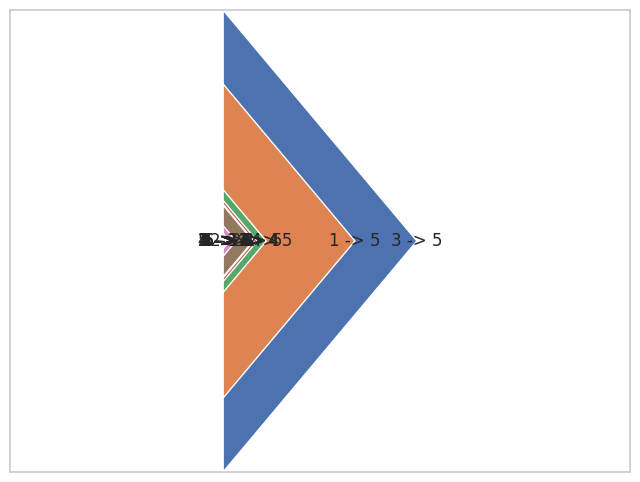

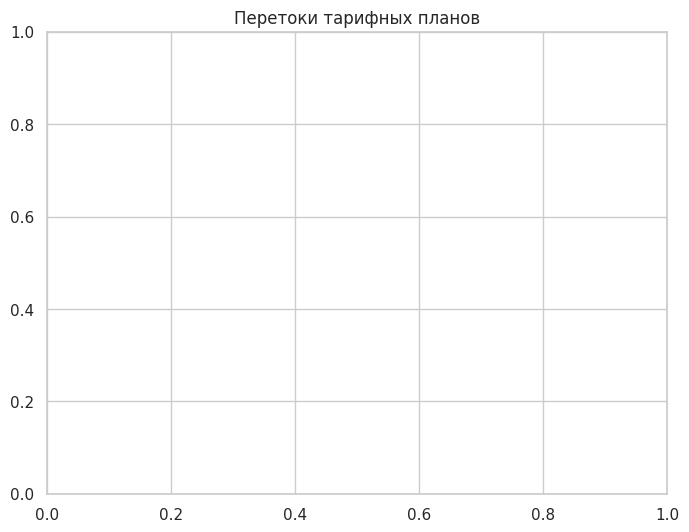

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

# Создание Sankey диаграммы
sankey = Sankey(unit=None)
for index, row in flows.iterrows():
    sankey.add(flows=[row['COUNT']], labels=[f"{int(row['PREV_TARIFF_PLAN_ID'])} -> {int(row['TARIFF_PLAN_ID'])}"], orientations=[0])

fig, ax = plt.subplots()
sankey.finish()
plt.title('Перетоки тарифных планов')
plt.show()


2**. Изменение среднемесячного счета**

       SUBSCRIBER_ID  TARIFF_PLAN_ID  AVG_BEFORE  AVG_AFTER     CHANGE
0                  1               2         NaN        NaN        NaN
1                  1               3      25.262  25.040333  -0.221667
2                  2               1         NaN        NaN        NaN
3                  2               5       5.661   5.132000  -0.529000
4                  3               1         NaN        NaN        NaN
...              ...             ...         ...        ...        ...
12339           5987               3       8.368   3.873000  -4.495000
12340           5988               1      19.667   9.551333 -10.115667
12341           5988               4      19.667   9.551333 -10.115667
12342           5989               5       1.294   5.068667   3.774667
12343           5989               1       1.294   5.068667   3.774667

[12344 rows x 5 columns]


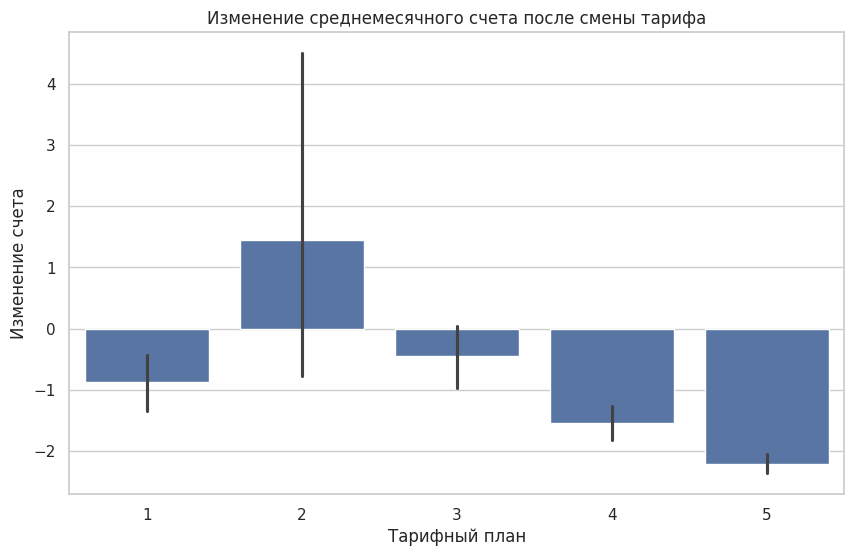

In [ ]:
import pandas as pd

# Загрузка данных
charges = pd.read_csv('Charges.csv')
tariff_changes = pd.read_csv('Tariff_plans_change.csv')

# Преобразование дат
tariff_changes['START_DTTM'] = pd.to_datetime(tariff_changes['START_DTTM'])
charges['BILL_MONTH'] = pd.to_datetime(charges['BILL_MONTH'])

# Функция для вычисления среднего счета за 3 месяца до и после изменения тарифа
def calculate_average_charges(subscriber_id, change_date):
    before_period = charges[(charges['SUBSCRIBER_ID'] == subscriber_id) & (charges['BILL_MONTH'] < change_date) & (charges['BILL_MONTH'] >= change_date - pd.DateOffset(months=3))]
    after_period = charges[(charges['SUBSCRIBER_ID'] == subscriber_id) & (charges['BILL_MONTH'] >= change_date) & (charges['BILL_MONTH'] < change_date + pd.DateOffset(months=3))]

    avg_before = before_period['CHARGES'].mean()
    avg_after = after_period['CHARGES'].mean()

    return avg_before, avg_after

# Применение функции для каждого абонента и расчет изменений
tariff_changes['AVG_BEFORE'] = tariff_changes.apply(lambda row: calculate_average_charges(row['SUBSCRIBER_ID'], row['START_DTTM'])[0], axis=1)
tariff_changes['AVG_AFTER'] = tariff_changes.apply(lambda row: calculate_average_charges(row['SUBSCRIBER_ID'], row['START_DTTM'])[1], axis=1)
tariff_changes['CHANGE'] = tariff_changes['AVG_AFTER'] - tariff_changes['AVG_BEFORE']

print(tariff_changes[['SUBSCRIBER_ID', 'TARIFF_PLAN_ID', 'AVG_BEFORE', 'AVG_AFTER', 'CHANGE']])

# Визуализация результатов
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='TARIFF_PLAN_ID', y='CHANGE', data=tariff_changes)
plt.title('Изменение среднемесячного счета после смены тарифа')
plt.xlabel('Тарифный план')
plt.ylabel('Изменение счета')
plt.show()


**3. Изменение уровня блокировок**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Suspended.csv to Suspended.csv


In [ ]:
import pandas as pd

# Загрузка данных
suspended = pd.read_csv('Suspended.csv')

# Замена $null$ на NaN
suspended['END_DT'] = suspended['END_DT'].replace('$null$', pd.NaT)

# Преобразование дат
suspended['START_DT'] = pd.to_datetime(suspended['START_DT'])
suspended['END_DT'] = pd.to_datetime(suspended['END_DT'])

# Замена NaN на текущее время для открытых блокировок
suspended['END_DT'] = suspended['END_DT'].fillna(pd.Timestamp('now'))

# Проверка данных
print(suspended.head())


   SUBSCRIBER_ID   START_DT                     END_DT     STATUS
0           5195 2017-12-27 2017-12-27 00:00:00.000000  Suspended
1           5198 2017-04-18 2017-04-18 00:00:00.000000  Suspended
2            381 2017-04-18 2017-04-20 00:00:00.000000  Suspended
3           3500 2017-12-21 2025-01-18 09:40:58.370750  Suspended
4           3302 2016-08-23 2016-09-07 00:00:00.000000  Suspended


<ipython-input-25-4fd23ae88b25>:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-25-4fd23ae88b25>:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

Направления смен тарифных планов с увеличением частоты блокировок:
    PREV_TARIFF_PLAN_ID  TARIFF_PLAN_ID    CHANGE
5                   2.0               1  0.230769
7                   2.0               4  0.145570
8                   2.0               5  0.038186
14                  4.0               1  0.095238
19                  5.0               1  0.038462
21                  5.0               3  0.072464
Направления смен тарифных планов с уменьшением частоты блокировок:
    PREV_TARIFF_PLAN_ID  TARIFF_PLAN_ID    CHANGE
1                   1.0               2 -0.400000
2                   1.0               3 -0.035714
3                   1.0               4 -0.057895
4                   1.0               5 -0.031889
10                  3.0               2 -0.600000
12                  3.0               4 -0.136000
13                  3.0               5 -0.065271
15                  4.0               2 -0.040000
16                  4.0               3 -0.041667
18              

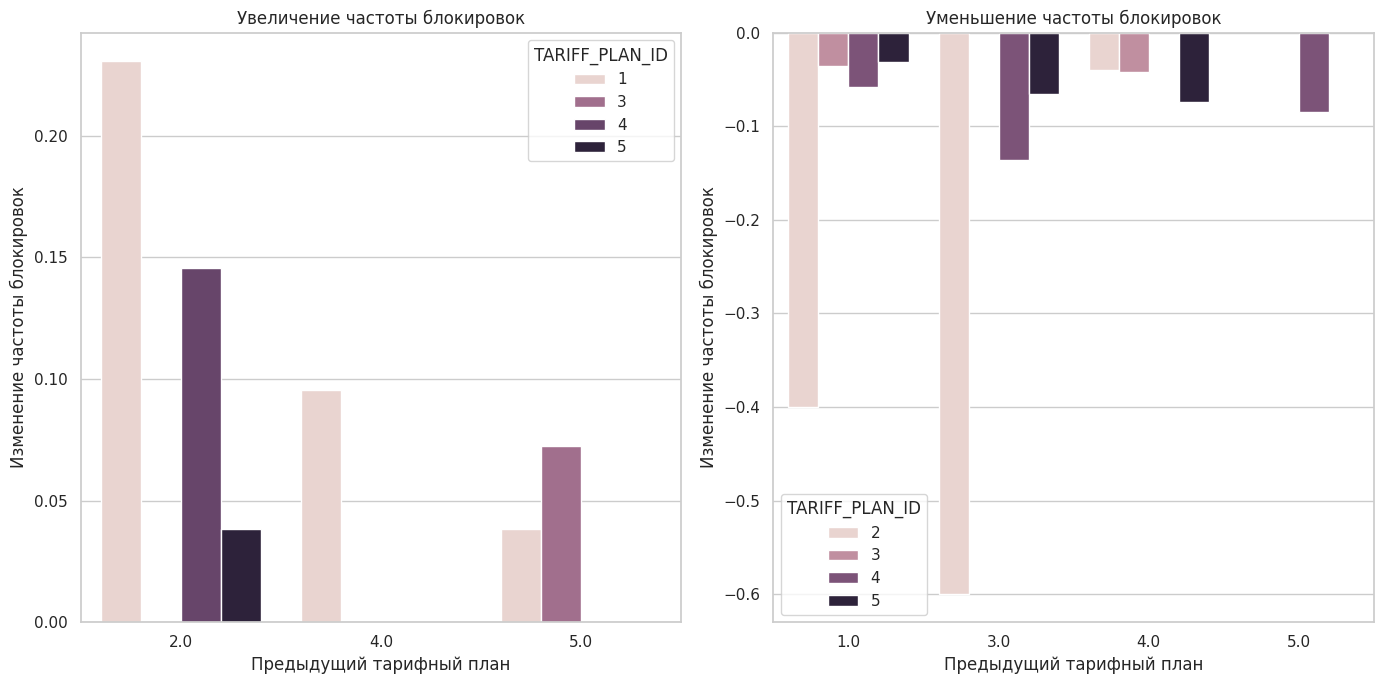

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
tariff_plans = pd.read_csv('Tariff_plans_change.csv')
suspended = pd.read_csv('Suspended.csv')

# Замена некорректных значений на NaT
tariff_plans['START_DTTM'].replace('$null$', pd.NaT, inplace=True)
tariff_plans['END_DTTM'].replace('$null$', pd.NaT, inplace=True)
suspended['START_DT'].replace('$null$', pd.NaT, inplace=True)
suspended['END_DT'].replace('$null$', pd.NaT, inplace=True)

# Преобразование дат в формат datetime
tariff_plans['START_DTTM'] = pd.to_datetime(tariff_plans['START_DTTM'])
tariff_plans['END_DTTM'] = pd.to_datetime(tariff_plans['END_DTTM'])
suspended['START_DT'] = pd.to_datetime(suspended['START_DT'])
suspended['END_DT'] = pd.to_datetime(suspended['END_DT'])

# Замена NaT на текущую дату для открытых блокировок
suspended['END_DT'] = suspended['END_DT'].fillna(pd.Timestamp('now'))

# Создание списка для хранения результатов
results = []

# Определение 3-месячных периодов до и после смены тарифного плана
for i, row in tariff_plans.iterrows():
    subscriber_id = row['SUBSCRIBER_ID']
    start_date = row['START_DTTM']

    # Период до смены
    pre_change_period = suspended[(suspended['SUBSCRIBER_ID'] == subscriber_id) &
                                  (suspended['START_DT'] >= (start_date - pd.DateOffset(months=3))) &
                                  (suspended['START_DT'] < start_date)]

    # Период после смены
    post_change_period = suspended[(suspended['SUBSCRIBER_ID'] == subscriber_id) &
                                   (suspended['START_DT'] >= start_date) &
                                   (suspended['START_DT'] < (start_date + pd.DateOffset(months=3)))]

    # Расчет частоты блокировок до и после смены
    pre_change_count = pre_change_period.shape[0]
    post_change_count = post_change_period.shape[0]

    # Вычисление изменения частоты блокировок
    change = post_change_count - pre_change_count

    # Сохранение результатов
    results.append([subscriber_id, row['TARIFF_PLAN_ID'], pre_change_count, post_change_count, change])

# Создание DataFrame из результатов
results_df = pd.DataFrame(results, columns=['SUBSCRIBER_ID', 'TARIFF_PLAN_ID', 'PRE_SUSPENDED_COUNT', 'POST_SUSPENDED_COUNT', 'CHANGE'])

# Определение предыдущего тарифного плана
tariff_plans['PREV_TARIFF_PLAN_ID'] = tariff_plans.groupby('SUBSCRIBER_ID')['TARIFF_PLAN_ID'].shift(1)
merged_df = pd.merge(tariff_plans, results_df, on=['SUBSCRIBER_ID', 'TARIFF_PLAN_ID'])
merged_df = merged_df.dropna(subset=['PREV_TARIFF_PLAN_ID'])

# Группировка данных по парам тарифных планов
grouped_df = merged_df.groupby(['PREV_TARIFF_PLAN_ID', 'TARIFF_PLAN_ID']).agg({'CHANGE': 'mean'}).reset_index()

# Определение направлений смен с увеличением и уменьшением частоты блокировок
increase = grouped_df[grouped_df['CHANGE'] > 0]
decrease = grouped_df[grouped_df['CHANGE'] < 0]

print("Направления смен тарифных планов с увеличением частоты блокировок:")
print(increase)

print("Направления смен тарифных планов с уменьшением частоты блокировок:")
print(decrease)

# Визуализация результатов
plt.figure(figsize=(14, 7))

# График увеличения частоты блокировок
plt.subplot(1, 2, 1)
sns.barplot(x='PREV_TARIFF_PLAN_ID', y='CHANGE', hue='TARIFF_PLAN_ID', data=increase)
plt.title('Увеличение частоты блокировок')
plt.xlabel('Предыдущий тарифный план')
plt.ylabel('Изменение частоты блокировок')

# График уменьшения частоты блокировок
plt.subplot(1, 2, 2)
sns.barplot(x='PREV_TARIFF_PLAN_ID', y='CHANGE', hue='TARIFF_PLAN_ID', data=decrease)
plt.title('Уменьшение частоты блокировок')
plt.xlabel('Предыдущий тарифный план')
plt.ylabel('Изменение частоты блокировок')

plt.tight_layout()
plt.show()

